# Machine Learning Pipeline 

** Build ML model with cross-validation to classify brain injury from EEG.**

* Testing models:

    * Random Forest
    * Linear SVM model
    * Gausian Naive Bayes

* Models with Cross-validation

In [1]:
# import comet_ml in the top of your file
from comet_ml import Experiment
    
# Add the following code anywhere in your machine learning file
experiment = Experiment(api_key="MBGyCd1hOFVR5EcPbUFAX8MHV",
                        project_name="eeg-trauma", workspace="bfaria-eeg")

COMET INFO: Experiment is live on comet.ml https://www.comet.ml/bfaria-eeg/eeg-trauma/5a6bcc60e55644489d9836901038d6b0



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.metrics import sensitivity_score, specificity_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
data_all = pd.read_csv('../mldataset/allfeatures.csv')
data_ml = pd.read_csv('../mldataset/featuresML.csv')
data_pval = pd.read_csv('../mldataset/featuresPVAL.csv')

In [4]:
data_all

,coh_nofilt_fp1_fp2,coh_nofilt_fp1_f7,coh_nofilt_fp1_f3,coh_nofilt_fp1_fz,coh_nofilt_fp1_f4,coh_nofilt_fp1_f8,coh_nofilt_fp1_t3,coh_nofilt_fp1_c3,coh_nofilt_fp1_c4,coh_nofilt_fp1_t4,...,psi_alpha_o2_t3,psi_alpha_o2_c3,psi_alpha_o2_c4,psi_alpha_o2_t4,psi_alpha_o2_t5,psi_alpha_o2_p3,psi_alpha_o2_pz,psi_alpha_o2_p4,psi_alpha_o2_t6,psi_alpha_o2_o1
0,0.849397,0.877339,0.857365,0.864015,0.795604,0.715263,0.611386,0.674974,0.672999,0.609560,...,1.137330,-2.535512,2.851893,-2.413355,-7.886247,-3.430358,-2.940278,4.755336,-2.372887,-6.151342
1,0.682347,0.795053,0.775378,0.657702,0.641092,0.713337,0.647718,0.536908,0.380917,0.541196,...,-0.069698,-0.223584,2.826703,-5.645081,-0.023241,-0.928270,1.025139,2.125412,0.000000,-0.129469
2,0.897231,0.847988,0.861601,0.828406,0.752612,0.744819,0.581250,0.791440,0.517047,0.518814,...,5.719148,4.841813,-4.843460,-2.764540,-1.046704,-2.972760,-6.569496,-2.928576,-0.443500,-0.663475
3,0.755840,0.844175,0.833709,0.886321,0.793390,0.741746,0.808783,0.861057,0.766067,0.809645,...,1.910294,0.064580,1.450907,-1.034041,-0.911907,-1.693191,-1.263543,-3.622760,-2.166221,1.226381
4,0.639640,0.906704,0.887078,0.892046,0.588968,0.631242,0.710337,0.635790,0.448039,0.564691,...,2.343783,-0.019518,-0.481569,1.608233,0.394639,0.247216,0.442689,0.863781,-0.006938,-0.153289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,0.396877,0.656498,0.576064,0.494556,0.420211,0.428643,0.563125,0.661773,0.500596,0.401992,...,-134.552255,-148.020175,-174.643489,-128.884761,-141.926243,-110.660944,-153.216632,-11.502160,-156.376620,-173.192321
181,0.462236,0.467286,0.384045,0.431943,0.400531,0.356827,0.378937,0.367412,0.380954,0.357517,...,-15.981099,-18.816348,-18.183475,-11.601831,-7.541968,-16.935812,-17.919610,-14.430107,-6.426578,-7.388289
182,0.833737,0.924463,0.834045,0.797401,0.716631,0.788221,0.774200,0.666065,0.550072,0.700391,...,5.923263,7.676919,19.279992,37.209661,3.557597,3.770691,4.755026,0.985402,3.500394,0.911847
183,0.611631,0.875651,0.906435,0.882049,0.470444,0.513214,0.730145,0.792010,0.396715,0.473648,...,-26.785091,51.345199,-32.453846,-37.773608,70.624488,-18.838973,-11.220369,-21.244065,-10.816045,-16.059869


In [5]:
data_ml

,coh_nofilt_fp1_f3,coh_nofilt_fp2_pz,coh_nofilt_f7_t3,coh_nofilt_t3_c3,coh_beta_fp1_f3,coh_beta_fp2_o2,coh_beta_f7_t3,coh_beta_f8_t4,coh_beta_t3_c3,coh_beta_t3_t5,...,env_theta_t3_c4,env_theta_c3_t4,bands_beta_f8,bands_theta_f8,bands_beta_t3,bands_gamma_t3,bands_beta_t4,psi_alpha_fz_fp1,fn,target
0,0.857365,0.598601,0.735782,0.711858,0.907236,0.656662,0.667533,0.818214,0.679529,0.743059,...,0.276645,0.277616,0.006395,0.005768,0.006494,0.000206,0.007673,1.974668,00b2d6e257e2f615.csv,trauma
1,0.775378,0.462641,0.740455,0.752089,0.778246,0.551994,0.765772,0.777790,0.695963,0.761634,...,0.207531,0.259119,0.012355,0.007541,0.011056,0.000261,0.009891,0.328779,09769097749fb286.csv,trauma
2,0.861601,0.608105,0.684884,0.566620,0.824410,0.694576,0.727593,0.771918,0.696993,0.745449,...,0.104273,0.082459,0.008266,0.005058,0.012101,0.000345,0.009680,-0.456302,0b84dd748e7d5edd.csv,trauma
3,0.833709,0.762546,0.824584,0.872429,0.945076,0.547642,0.630405,0.538873,0.773210,0.770875,...,0.134421,0.128373,0.015155,0.003900,0.012688,0.000515,0.012579,-0.515633,158ce5e17a662599.csv,trauma
4,0.887078,0.384395,0.785085,0.669723,0.865782,0.399770,0.812996,0.820392,0.546730,0.746709,...,0.286608,0.394275,0.009656,0.005332,0.012842,0.001847,0.010304,0.343956,17df70855fa4922a.csv,trauma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,0.576064,0.370776,0.654506,0.831554,0.661389,0.407475,0.698181,0.424769,0.869548,0.842076,...,0.273795,0.541565,0.056193,0.174590,0.052195,0.012676,0.131831,-10.572390,b5abacb75ebc40b8.csv,healthy
181,0.384045,0.362990,0.809818,0.873016,0.373086,0.356862,0.863759,0.970902,0.899040,0.944191,...,0.477249,0.458986,0.001266,0.001582,0.002670,0.000314,0.003727,0.214012,bb47addde80c51c0.csv,healthy
182,0.834045,0.400356,0.892363,0.732350,0.876810,0.516392,0.910603,0.904642,0.744009,0.846009,...,0.725392,0.647903,0.005584,0.004330,0.005858,0.000640,0.006279,-0.130126,bc9ecd77d29ef5fb.csv,healthy
183,0.906435,0.344764,0.887011,0.865872,0.926126,0.354257,0.883980,0.722524,0.852169,0.870898,...,0.370937,0.513153,0.005905,0.008089,0.011235,0.000735,0.007409,-0.925306,bcfaa165d982034b.csv,healthy


In [6]:
data_pval

,coh_nofilt_fp1_c4,coh_nofilt_fp2_c3,coh_nofilt_f4_f8,coh_nofilt_f8_t4,coh_nofilt_t4_p4,coh_nofilt_t4_t6,coh_nofilt_t5_p3,coh_nofilt_t5_o1,coh_nofilt_p4_t6,coh_alpha_fp2_pz,...,env_nofilt_fp1_t4,env_nofilt_f4_c4,env_nofilt_f8_c4,env_nofilt_f8_t4,env_beta_fp1_c4,env_beta_fp2_t5,bands_gamma_fp1,bands_beta_t3,psi_alpha_fp2_fp1,fn
0,0.672999,0.549203,0.851620,0.772885,0.724641,0.783557,0.900922,0.836930,0.868253,0.526640,...,0.302625,0.630256,0.475648,0.654537,0.406085,0.188201,0.000176,0.006494,0.321819,00b2d6e257e2f615.csv
1,0.380917,0.396774,0.812375,0.735646,0.533897,0.641441,0.805095,0.889171,0.485035,0.495919,...,0.622319,0.409803,0.413256,0.795929,0.153925,0.239554,0.000265,0.011056,3.356577,09769097749fb286.csv
2,0.517047,0.713608,0.790806,0.722790,0.652574,0.823771,0.732795,0.908678,0.746679,0.672865,...,0.239469,0.373261,0.291227,0.630412,0.186785,0.396535,0.000048,0.012101,-1.559049,0b84dd748e7d5edd.csv
3,0.766067,0.749919,0.809885,0.781487,0.784892,0.831993,0.961486,0.954441,0.953717,0.566018,...,0.404723,0.566994,0.259906,0.368198,0.310849,0.056654,0.000345,0.012688,0.190865,158ce5e17a662599.csv
4,0.448039,0.371057,0.831079,0.741596,0.488869,0.633956,0.783253,0.842702,0.768984,0.557156,...,0.526258,0.340932,0.320422,0.729032,0.156791,0.238352,0.001411,0.012842,-0.252957,17df70855fa4922a.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,0.500596,0.392811,0.542254,0.423986,0.452564,0.530629,0.850935,0.524886,0.463810,0.341981,...,0.275681,0.271957,0.329791,0.446227,0.673633,0.615834,0.007562,0.052195,-20.573506,b5abacb75ebc40b8.csv
181,0.380954,0.379634,0.763106,0.950383,0.892393,0.940121,0.885386,0.862981,0.848179,0.385140,...,0.126474,0.727015,0.682744,0.948118,0.226216,0.214389,0.000061,0.002670,0.478146,bb47addde80c51c0.csv
182,0.550072,0.465025,0.859951,0.872154,0.681088,0.772996,0.948238,0.955194,0.766539,0.345600,...,0.564721,0.479159,0.562449,0.820959,0.393832,0.277069,0.001029,0.005858,-1.519827,bc9ecd77d29ef5fb.csv
183,0.396715,0.363774,0.784897,0.669324,0.572603,0.676711,0.913620,0.919220,0.820510,0.396008,...,0.144990,0.163735,0.146113,0.350062,0.127400,0.097446,0.001164,0.011235,19.136037,bcfaa165d982034b.csv


# 1) Classification task using All features

In [10]:
data_all['target'] = data_all['target'].apply(lambda x: 0 if x=='healthy' else 1 if x=='trauma' else None)  
X = data_all.drop(['fn','target'], axis=1)
y = data_all.target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

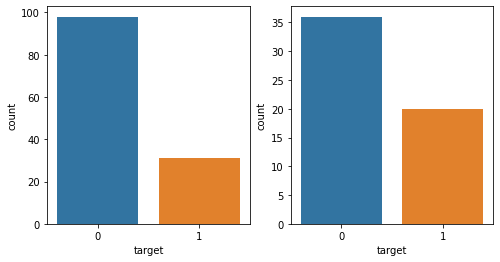

In [12]:
fig, axs = plt.subplots(1,2, figsize=[8,4])
sns.countplot(y_train, ax=axs[0])
sns.countplot(y_test, ax=axs[1])

In [13]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.fit_transform(X_test)
X_sc = scaler.fit_transform(X)

In [19]:
grid={'n_estimators':[10, 100, 300, 500], 'max_features': ['auto', 'sqrt', 'log2'],"class_weight":['none','balanced']}

rdf=RandomForestClassifier(random_state=101)

rdf_cv=GridSearchCV(rdf,grid,cv=10, n_jobs=-1)
rdf_cv.fit(X_train_sc,y_train)

print("tuned hpyerparameters :(best parameters) ",rdf_cv.best_params_)
print("accuracy :",rdf_cv.best_score_)

for i in range(len(rdf_cv.cv_results_['params'])):
    for k,v in rdf_cv.cv_results_.items():
        if k == "params":
            experiment.log_parameters(v[i])
        else:
            experiment.log_metric(k,v[i])

tuned hpyerparameters :(best parameters)  {'class_weight': 'balanced', 'max_features': 'auto', 'n_estimators': 100}
accuracy : 0.8211538461538463


In [24]:
rdf = RandomForestClassifier(max_features='auto', n_estimators=100, class_weight='balanced', random_state=101)
rdf.fit(X_train_sc, y_train)

y_pred_trainp = cross_val_predict(rdf, X_train_sc, y_train, method='predict_proba', cv=10)[:,1] 
y_predp = cross_val_predict(rdf, X_test_sc, y_test, method='predict_proba', cv=10)[:,1] 
y_allp = cross_val_predict(rdf, X_sc, y, method='predict_proba', cv=10)[:,1]
roc_train = roc_auc_score(y_train, y_pred_trainp)
roc_test = roc_auc_score(y_test, y_predp)
roc_all = roc_auc_score(y, y_allp)
print('ROC_AUC score train: ', roc_train)
print('ROC_AUC score test: ', roc_train)

y_pred_train = cross_val_predict(rdf, X_train_sc, y_train, method='predict', cv=10)
y_pred = cross_val_predict(rdf, X_test_sc, y_test, method='predict', cv=10)
sen_train = sensitivity_score(y_train, y_pred_train)
sen_test = sensitivity_score(y_test, y_pred)
spe_train = specificity_score(y_train, y_pred_train)
spe_test = specificity_score(y_test, y_pred)
print('Sensitivity for train: ', sen_train)
print('Sensitivity for test: ', sen_test)
print('Specificity for train: ', spe_train)
print('Specificity for test: ', spe_test)

print('Confusion matrix for RFC')
print(confusion_matrix(y_test, y_pred))


#these will be logged to your sklearn-demos project on Comet.ml
params={"random_state":101,
        "model_type":"rdf",
        "scaler":"standard scaler"}

metrics = {"roc_auc_score":roc_train,
"sensitivity":sen_train,
"specificity":spe_train
}

experiment.log_dataset_hash(X_train_sc)
experiment.log_parameters(params)
experiment.log_metrics(metrics)

ROC_AUC score train:  0.880348913759052
ROC_AUC score test:  0.880348913759052
Sensitivity for train:  0.4838709677419355
Sensitivity for test:  0.3
Specificity for train:  0.9285714285714286
Specificity for test:  0.9444444444444444
Confusion matrix for RFC
[[34  2]
 [14  6]]


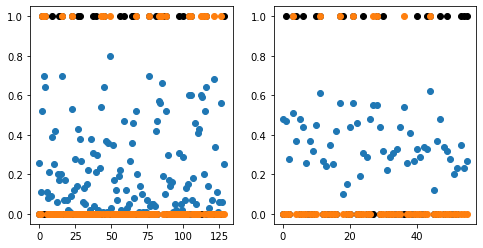

In [25]:
fig, axs = plt.subplots(1,2, figsize=[8,4])

axs[0].plot(y_train.values, 'ko')
axs[0].plot(y_pred_trainp, 'o')
axs[0].plot(y_pred_train, 'o')

axs[1].plot(y_test.values, 'ko')
axs[1].plot(y_predp, 'o')
axs[1].plot(y_pred, 'o')

In [26]:
gnb = GaussianNB().fit(X_train_sc, y_train) 

y_pred_trainp = cross_val_predict(gnb, X_train_sc, y_train, method='predict_proba', cv=10)[:,1] 
y_predp = cross_val_predict(gnb, X_test_sc, y_test, method='predict_proba', cv=10)[:,1] 
y_allp = cross_val_predict(gnb, X_sc, y, method='predict_proba', cv=10)[:,1]
roc_train = roc_auc_score(y_train, y_pred_trainp)
roc_test = roc_auc_score(y_test, y_predp)
roc_all = roc_auc_score(y, y_allp)
print('ROC_AUC score train: ', roc_train)
print('ROC_AUC score test: ', roc_train)

y_pred_train = cross_val_predict(gnb, X_train_sc, y_train, method='predict', cv=10)
y_pred = cross_val_predict(gnb, X_test_sc, y_test, method='predict', cv=10)
sen_train = sensitivity_score(y_train, y_pred_train)
sen_test = sensitivity_score(y_test, y_pred)
spe_train = specificity_score(y_train, y_pred_train)
spe_test = specificity_score(y_test, y_pred)
print('Sensitivity for train: ', sen_train)
print('Sensitivity for test: ', sen_test)
print('Specificity for train: ', spe_train)
print('Specificity for test: ', spe_test) 

print('Confusion matrix for GNB')
print(confusion_matrix(y_test, y_pred))

#these will be logged to your sklearn-demos project on Comet.ml
params={"model_type":"gnb",
        "scaler":"standard scaler"}

metrics = {"roc_auc_score":roc_train,
"sensitivity":sen_train,
"specificity":spe_train
}

experiment.log_dataset_hash(X_train_sc)
experiment.log_metrics(metrics)

ROC_AUC score train:  0.8341013824884793
ROC_AUC score test:  0.8341013824884793
Sensitivity for train:  0.8387096774193549
Sensitivity for test:  0.8
Specificity for train:  0.7653061224489796
Specificity for test:  0.2777777777777778
Confusion matrix for GNB
[[10 26]
 [ 4 16]]


In [29]:
grid={'C':[1,10, 100], 'kernel': ['linear','rbf'],"class_weight":['none','balanced']}

svc=SVC(random_state=101)

svc_cv=GridSearchCV(svs,grid,cv=10, n_jobs=-1)
svc_cv.fit(X_train_sc,y_train)

print("tuned hpyerparameters :(best parameters) ",svc_cv.best_params_)
print("accuracy :",svc_cv.best_score_)

for i in range(len(svc_cv.cv_results_['params'])):
    for k,v in svc_cv.cv_results_.items():
        if k == "params":
            experiment.log_parameters(v[i])
        else:
            experiment.log_metric(k,v[i])

tuned hpyerparameters :(best parameters)  {'C': 1, 'class_weight': 'balanced', 'kernel': 'rbf'}
accuracy : 0.8371794871794872


In [31]:
svc = SVC(C=1, kernel='rbf', class_weight='balanced', random_state=101, probability=True)
svc.fit(X_train_sc, y_train)

y_pred_trainp = cross_val_predict(svc, X_train_sc, y_train, method='predict_proba', cv=10)[:,1] 
y_predp = cross_val_predict(svc, X_test_sc, y_test, method='predict_proba', cv=10)[:,1] 
y_allp = cross_val_predict(svc, X_sc, y, method='predict_proba', cv=10)[:,1]
roc_train = roc_auc_score(y_train, y_pred_trainp)
roc_test = roc_auc_score(y_test, y_predp)
roc_all = roc_auc_score(y, y_allp)
print('ROC_AUC score train: ', roc_train)
print('ROC_AUC score test: ', roc_train)

y_pred_train = cross_val_predict(svc, X_train_sc, y_train, method='predict', cv=10)
y_pred = cross_val_predict(svc, X_test_sc, y_test, method='predict', cv=10)
sen_train = sensitivity_score(y_train, y_pred_train)
sen_test = sensitivity_score(y_test, y_pred)
spe_train = specificity_score(y_train, y_pred_train)
spe_test = specificity_score(y_test, y_pred)
print('Sensitivity for train: ', sen_train)
print('Sensitivity for test: ', sen_test)
print('Specificity for train: ', spe_train)
print('Specificity for test: ', spe_test)

print('Confusion matrix for RFC')
print(confusion_matrix(y_test, y_pred))


#these will be logged to your sklearn-demos project on Comet.ml
params={"random_state":101,
        "model_type":"svc",
        "scaler":"standard scaler"}

metrics = {"roc_auc_score":roc_train,
"sensitivity":sen_train,
"specificity":spe_train
}

experiment.log_dataset_hash(X_train_sc)
experiment.log_parameters(params)
experiment.log_metrics(metrics)

ROC_AUC score train:  0.8923633969716919
ROC_AUC score test:  0.8923633969716919
Sensitivity for train:  0.8064516129032258
Sensitivity for test:  0.6
Specificity for train:  0.8469387755102041
Specificity for test:  0.5833333333333334
Confusion matrix for RFC
[[21 15]
 [ 8 12]]


# 2) Classification task using All features

In [37]:
def rfc_grid(X,y):

    grid={'n_estimators':[10, 100, 300, 500], 'max_features': ['auto', 'sqrt', 'log2'],"class_weight":['none','balanced']}

    rdf=RandomForestClassifier(random_state=101)

    rdf_cv=GridSearchCV(rdf,grid,cv=10, n_jobs=-1)
    rdf_cv.fit(X,y)

    print("tuned hpyerparameters :(best parameters) ",rdf_cv.best_params_)
    print("accuracy :",rdf_cv.best_score_)

    for i in range(len(rdf_cv.cv_results_['params'])):
        for k,v in rdf_cv.cv_results_.items():
            if k == "params":
                experiment.log_parameters(v[i])
            else:
                experiment.log_metric(k,v[i])

def cal_meth(model, X, X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train)

    y_pred_trainp = cross_val_predict(model, X_train, y_train, method='predict_proba', cv=10)[:,1] 
    y_predp = cross_val_predict(model, X_test, y_test, method='predict_proba', cv=10)[:,1] 
    y_allp = cross_val_predict(model, X, y, method='predict_proba', cv=10)[:,1]
    roc_train = roc_auc_score(y_train, y_pred_trainp)
    roc_test = roc_auc_score(y_test, y_predp)
    roc_all = roc_auc_score(y, y_allp)
    print('ROC_AUC score train: ', roc_train)
    print('ROC_AUC score test: ', roc_train)

    y_pred_train = cross_val_predict(model, X_train, y_train, method='predict', cv=10)
    y_pred = cross_val_predict(model, X_test, y_test, method='predict', cv=10)
    sen_train = sensitivity_score(y_train, y_pred_train)
    sen_test = sensitivity_score(y_test, y_pred)
    spe_train = specificity_score(y_train, y_pred_train)
    spe_test = specificity_score(y_test, y_pred)
    print('Sensitivity for train: ', sen_train)
    print('Sensitivity for test: ', sen_test)
    print('Specificity for train: ', spe_train)
    print('Specificity for test: ', spe_test)

    print('Confusion matrix for RFC')
    print(confusion_matrix(y_test, y_pred))


    #these will be logged to your sklearn-demos project on Comet.ml
    params={"random_state":101,
            "model_type":"model",
            "scaler":"standard scaler"}

    metrics = {"roc_auc_score":roc_train,
    "sensitivity":sen_train,
    "specificity":spe_train
    }

    experiment.log_dataset_hash(X_train)
    experiment.log_parameters(params)
    experiment.log_metrics(metrics)

def gnb_meth(X, X_train, X_test, y_train, y_test):
    
    gnb = GaussianNB().fit(X_train, y_train) 

    y_pred_trainp = cross_val_predict(gnb, X_train, y_train, method='predict_proba', cv=10)[:,1] 
    y_predp = cross_val_predict(gnb, X_test, y_test, method='predict_proba', cv=10)[:,1] 
    y_allp = cross_val_predict(gnb, X, y, method='predict_proba', cv=10)[:,1]
    roc_train = roc_auc_score(y_train, y_pred_trainp)
    roc_test = roc_auc_score(y_test, y_predp)
    roc_all = roc_auc_score(y, y_allp)
    print('ROC_AUC score train: ', roc_train)
    print('ROC_AUC score test: ', roc_train)

    y_pred_train = cross_val_predict(gnb, X_train, y_train, method='predict', cv=10)
    y_pred = cross_val_predict(gnb, X_test, y_test, method='predict', cv=10)
    sen_train = sensitivity_score(y_train, y_pred_train)
    sen_test = sensitivity_score(y_test, y_pred)
    spe_train = specificity_score(y_train, y_pred_train)
    spe_test = specificity_score(y_test, y_pred)
    print('Sensitivity for train: ', sen_train)
    print('Sensitivity for test: ', sen_test)
    print('Specificity for train: ', spe_train)
    print('Specificity for test: ', spe_test) 

    print('Confusion matrix for GNB')
    print(confusion_matrix(y_test, y_pred))

    #these will be logged to your sklearn-demos project on Comet.ml
    params={"model_type":"gnb",
            "scaler":"standard scaler"}

    metrics = {"roc_auc_score":roc_train,
    "sensitivity":sen_train,
    "specificity":spe_train
    }

    experiment.log_dataset_hash(X_train_sc)
    experiment.log_metrics(metrics)
    
def svc_grid(X,y):

    grid={'C':[1,10, 100], 'kernel': ['linear','rbf'],"class_weight":['none','balanced']}

    svc=SVC(random_state=101)

    svc_cv=GridSearchCV(svs,grid,cv=10, n_jobs=-1)
    svc_cv.fit(X,y)

    print("tuned hpyerparameters :(best parameters) ",svc_cv.best_params_)
    print("accuracy :",svc_cv.best_score_)

    for i in range(len(svc_cv.cv_results_['params'])):
        for k,v in svc_cv.cv_results_.items():
            if k == "params":
                experiment.log_parameters(v[i])
            else:
                experiment.log_metric(k,v[i])

In [33]:
data_ml['target'] = data_ml['target'].apply(lambda x: 0 if x=='healthy' else 1 if x=='trauma' else None)  
X = data_ml.drop(['fn','target'], axis=1)
y = data_ml.target

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.fit_transform(X_test)
X_sc = scaler.fit_transform(X)

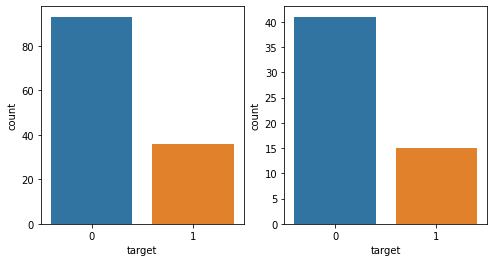

In [35]:
fig, axs = plt.subplots(1,2, figsize=[8,4])
sns.countplot(y_train, ax=axs[0])
sns.countplot(y_test, ax=axs[1])

In [36]:
rfc_grid(X_train_sc,y_train)

tuned hpyerparameters :(best parameters)  {'class_weight': 'balanced', 'max_features': 'auto', 'n_estimators': 10}
accuracy : 0.8448717948717951


In [38]:
rdf = RandomForestClassifier(max_features='auto', n_estimators=10, class_weight='balanced', random_state=101)
cal_meth(rdf,X_sc,X_train_sc,X_test_sc,y_train,y_test)

ROC_AUC score train:  0.9050179211469533
ROC_AUC score test:  0.9050179211469533
Sensitivity for train:  0.6111111111111112
Sensitivity for test:  0.4
Specificity for train:  0.9354838709677419
Specificity for test:  0.926829268292683
Confusion matrix for RFC
[[38  3]
 [ 9  6]]


In [39]:
gnb_meth(X_sc, X_train_sc, X_test_sc, y_train, y_test)

ROC_AUC score train:  0.8279569892473118
ROC_AUC score test:  0.8279569892473118
Sensitivity for train:  0.6944444444444444
Sensitivity for test:  0.6666666666666666
Specificity for train:  0.8172043010752689
Specificity for test:  0.8536585365853658
Confusion matrix for GNB
[[35  6]
 [ 5 10]]


In [40]:
svc_grid(X_train_sc,y_train)

tuned hpyerparameters :(best parameters)  {'C': 10, 'class_weight': 'balanced', 'kernel': 'linear'}
accuracy : 0.7916666666666667


In [41]:
svc = SVC(C=10, kernel='linear', class_weight='balanced', random_state=101, probability=True)
cal_meth(svc,X_sc,X_train_sc,X_test_sc,y_train,y_test)

ROC_AUC score train:  0.7628434886499402
ROC_AUC score test:  0.7628434886499402
Sensitivity for train:  0.6944444444444444
Sensitivity for test:  0.5333333333333333
Specificity for train:  0.8279569892473119
Specificity for test:  0.7804878048780488
Confusion matrix for RFC
[[32  9]
 [ 7  8]]


# 3) Classification task using All features

In [44]:
data_pval['target'] = data_all['target']
data_pval['target'].apply(lambda x: 0 if x=='healthy' else 1 if x=='trauma' else None)  
X = data_pval.drop(['fn','target'], axis=1)
y = data_pval.target

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.fit_transform(X_test)
X_sc = scaler.fit_transform(X)

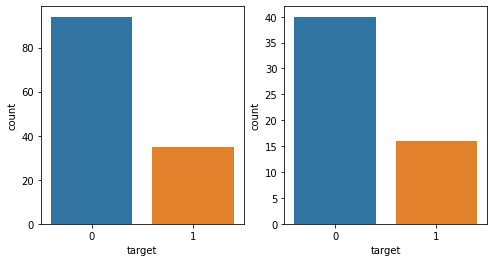

In [46]:
fig, axs = plt.subplots(1,2, figsize=[8,4])
sns.countplot(y_train, ax=axs[0])
sns.countplot(y_test, ax=axs[1])

In [47]:
rfc_grid(X_train_sc,y_train)

tuned hpyerparameters :(best parameters)  {'class_weight': 'balanced', 'max_features': 'log2', 'n_estimators': 300}
accuracy : 0.7987179487179488


In [48]:
rdf = RandomForestClassifier(max_features='log2', n_estimators=300, class_weight='balanced', random_state=101)
cal_meth(rdf,X_sc,X_train_sc,X_test_sc,y_train,y_test)

ROC_AUC score train:  0.8045592705167173
ROC_AUC score test:  0.8045592705167173
Sensitivity for train:  0.34285714285714286
Sensitivity for test:  0.4375
Specificity for train:  0.9680851063829787
Specificity for test:  0.925
Confusion matrix for RFC
[[37  3]
 [ 9  7]]


In [49]:
gnb_meth(X_sc, X_train_sc, X_test_sc, y_train, y_test)

ROC_AUC score train:  0.7278115501519757
ROC_AUC score test:  0.7278115501519757
Sensitivity for train:  0.6571428571428571
Sensitivity for test:  0.5
Specificity for train:  0.7553191489361702
Specificity for test:  0.775
Confusion matrix for GNB
[[31  9]
 [ 8  8]]


In [50]:
svc_grid(X_train_sc,y_train)

tuned hpyerparameters :(best parameters)  {'C': 10, 'class_weight': 'balanced', 'kernel': 'rbf'}
accuracy : 0.8211538461538461


In [51]:
svc = SVC(C=10, kernel='rbf', class_weight='balanced', random_state=101, probability=True)
cal_meth(svc,X_sc,X_train_sc,X_test_sc,y_train,y_test)

ROC_AUC score train:  0.8243161094224923
ROC_AUC score test:  0.8243161094224923
Sensitivity for train:  0.6
Sensitivity for test:  0.5
Specificity for train:  0.9042553191489362
Specificity for test:  0.85
Confusion matrix for RFC
[[34  6]
 [ 8  8]]
